In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("test.csv")
df

,horizon,n_epoch,fold,expid,trainMSE,testMSE,trainR2,testR2
0,1,1,1,101,0.80,0.90,NaN,NaN
1,1,2,1,101,0.70,0.80,NaN,NaN
2,1,3,1,101,0.60,0.70,NaN,NaN
3,1,1,2,101,0.71,0.80,NaN,NaN
4,1,2,2,101,0.69,0.75,NaN,NaN
5,1,3,2,101,0.58,0.62,NaN,NaN
6,1,3,1,101,NaN,NaN,0.2,0.16
7,1,3,2,101,NaN,NaN,0.3,0.21
8,2,1,1,101,0.80,0.90,NaN,NaN
9,2,2,1,101,0.70,0.80,NaN,NaN


In [ ]:
def plot_mses_across_experiments(df, exp_ids):
    for index, exp_id in enumerate(exp_ids):
        plot_mses_and_fill_betweens(df, exp_id, index)

In [32]:
def plot_mses_and_fill_betweens(df, exp_id, index=1, group="horizon", c6=sns.color_palette()):
    df = df[df["expid"] == exp_id]
    group_values = set(df[group])
    for group_value in group_values:
        plt.figure()
        epoch_group = df[df[group]==group_value].groupby("n_epoch")
        epoch_metrics = epoch_group.agg(np.mean)
        stdevs = epoch_group.agg(np.std)
        plt.plot(epoch_metrics["trainMSE"], '--', color=c6[index])
        plt.plot(epoch_metrics["testMSE"], color=c6[index])
        plt.fill_between(x=epoch_metrics.index, y1=epoch_metrics["testMSE"] + stdevs["testMSE"], y2=epoch_metrics["testMSE"] - stdevs["testMSE"], alpha=0.05)
        plt.title(group + ": " + str(group_value))

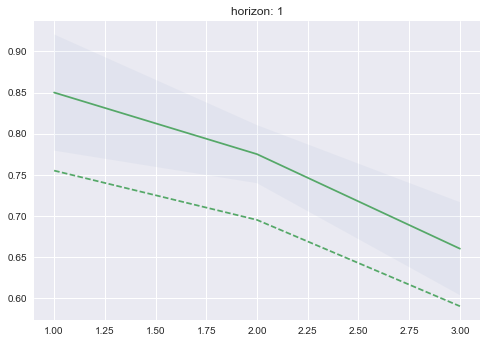

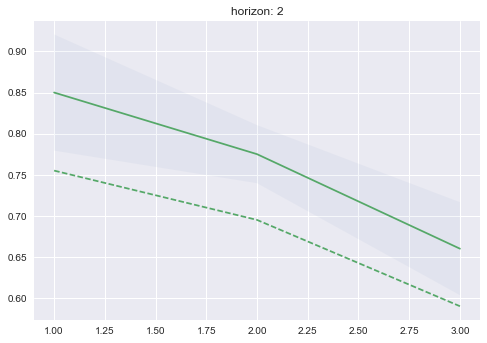

In [33]:
plot_mses_and_fill_betweens(df, 101)

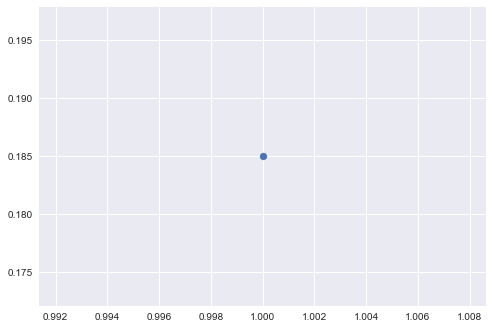

In [22]:
r2_metrics = epoch_metrics.dropna(subset=["trainR2"])
r2_stdevs = stdevs.dropna(subset=["trainR2"])
plt.scatter(x=r2_metrics.horizon, y=r2_metrics.testR2)